In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
# scikit-learn에서 데이터셋 받아오고 확인하기

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
print(df.tail())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  wo

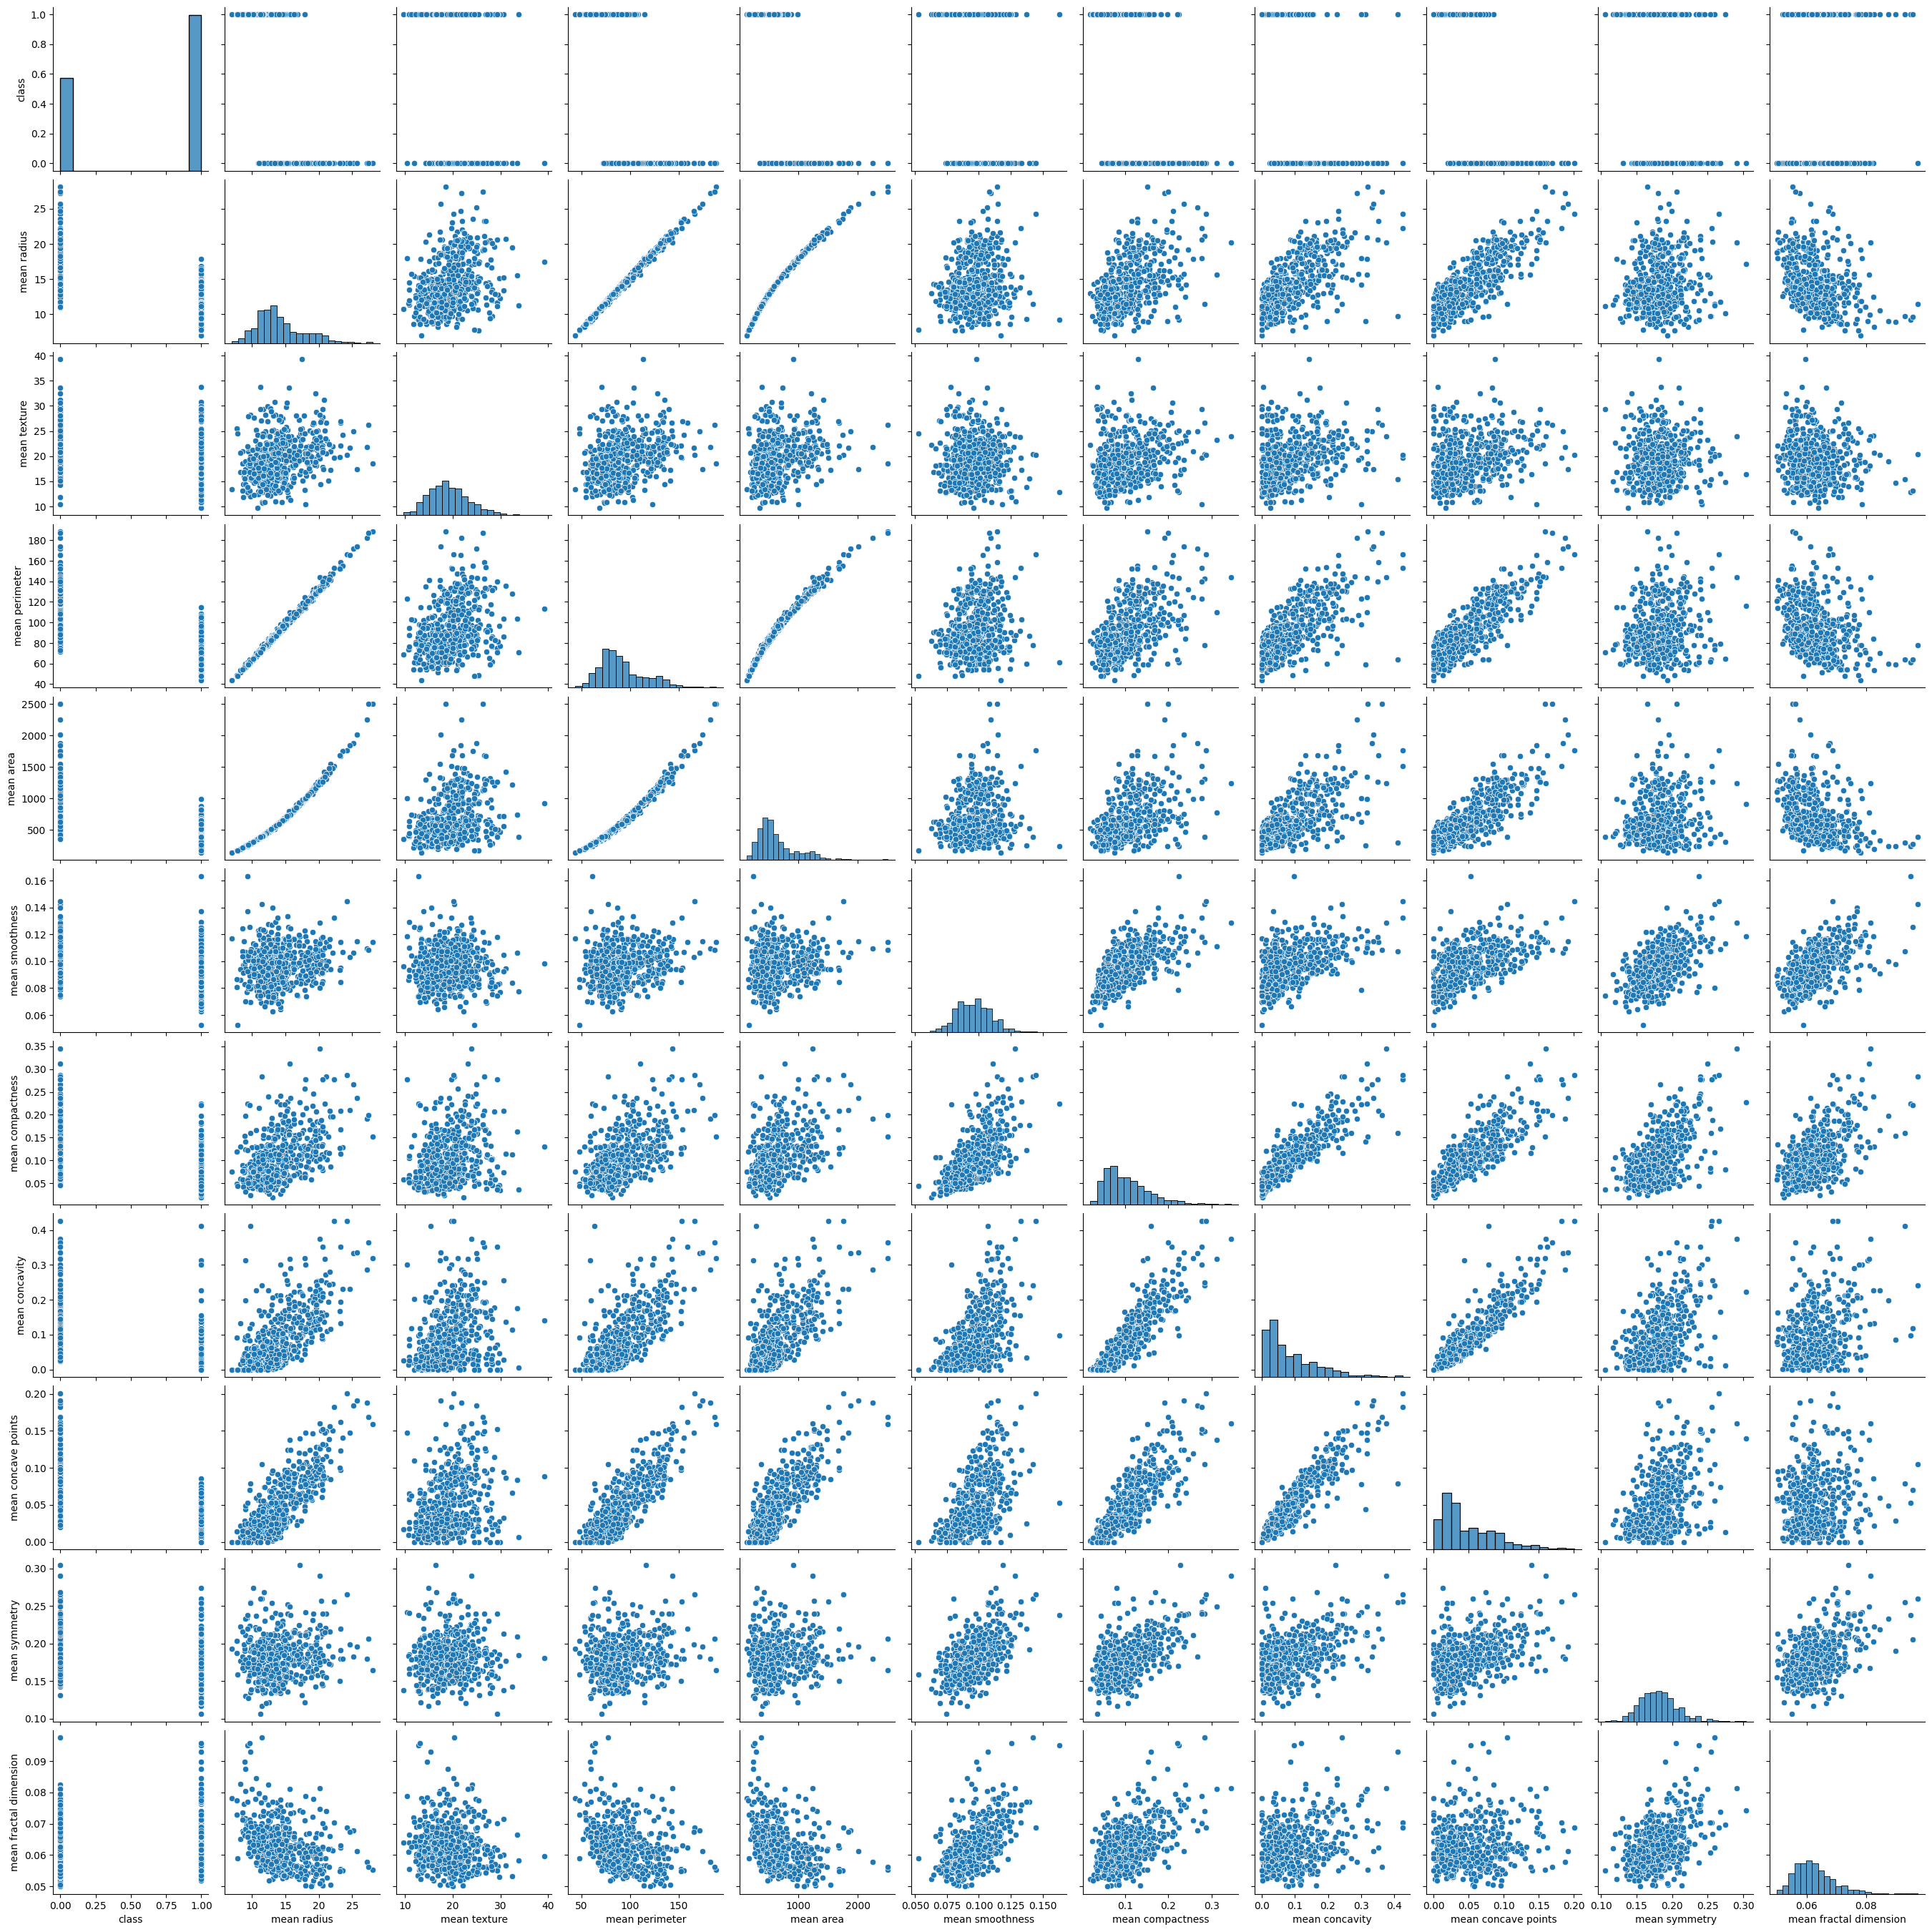

In [ ]:
# 데이터 시각화

sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

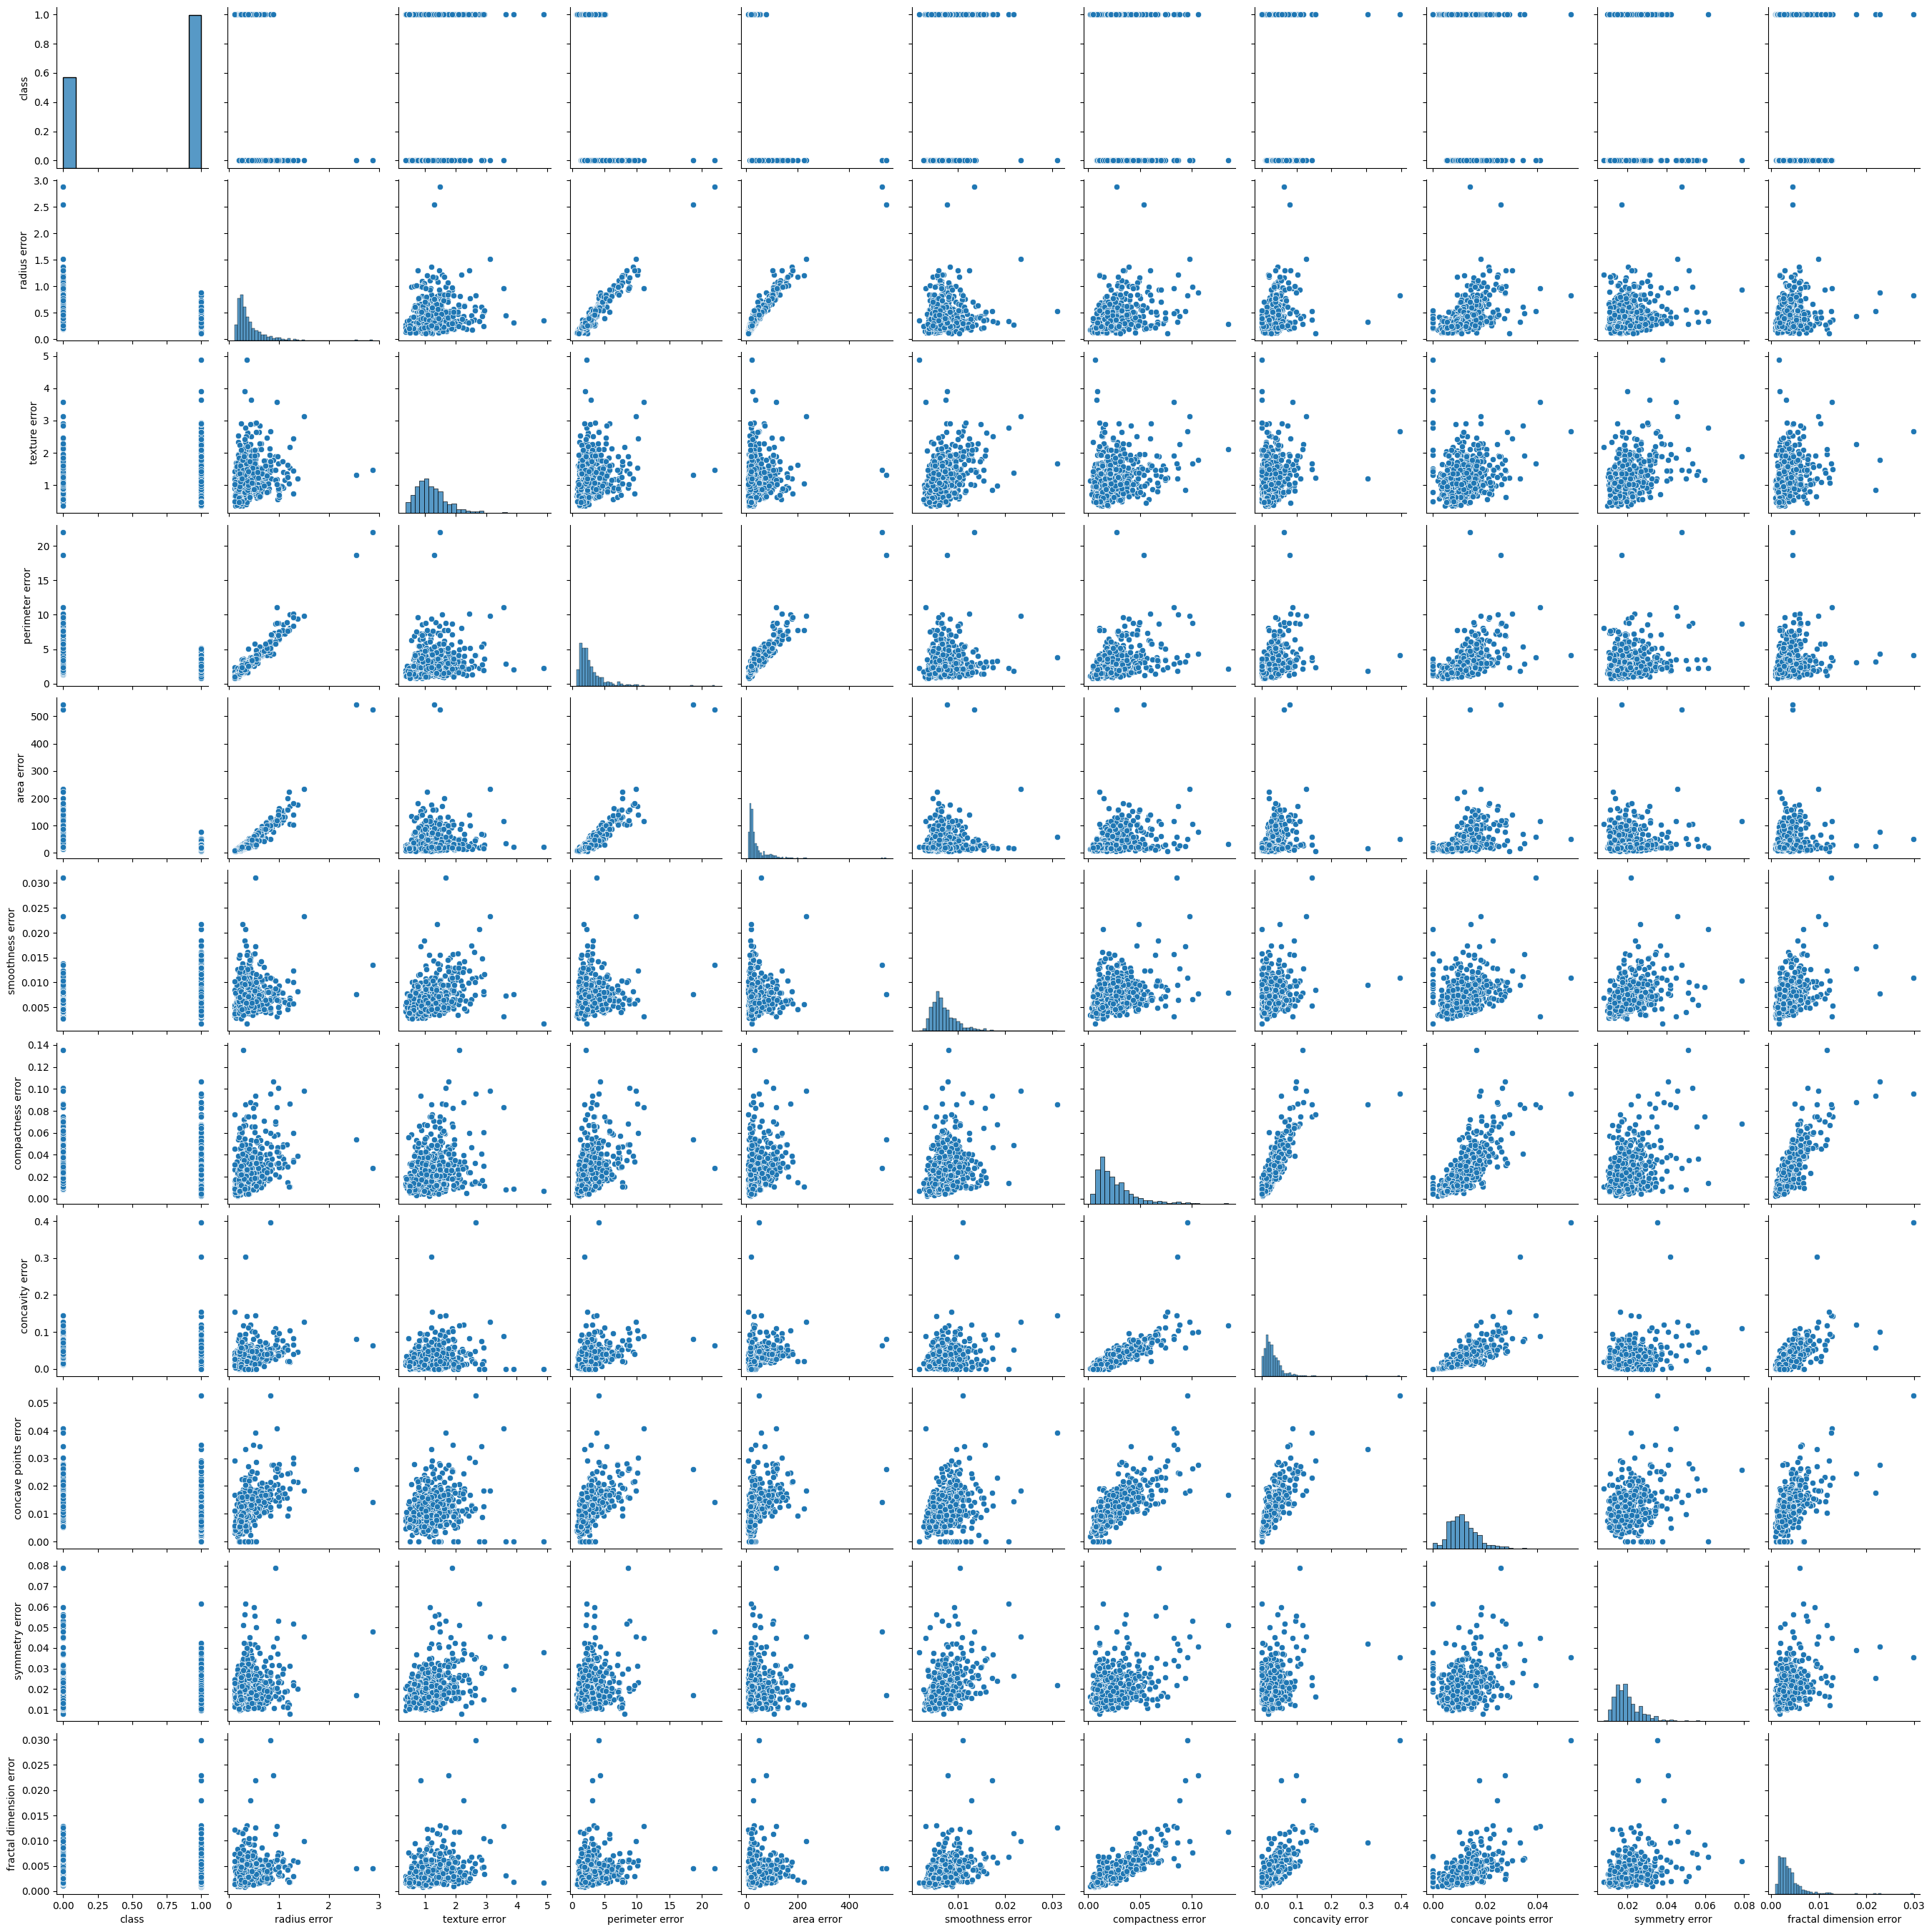

In [4]:
sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

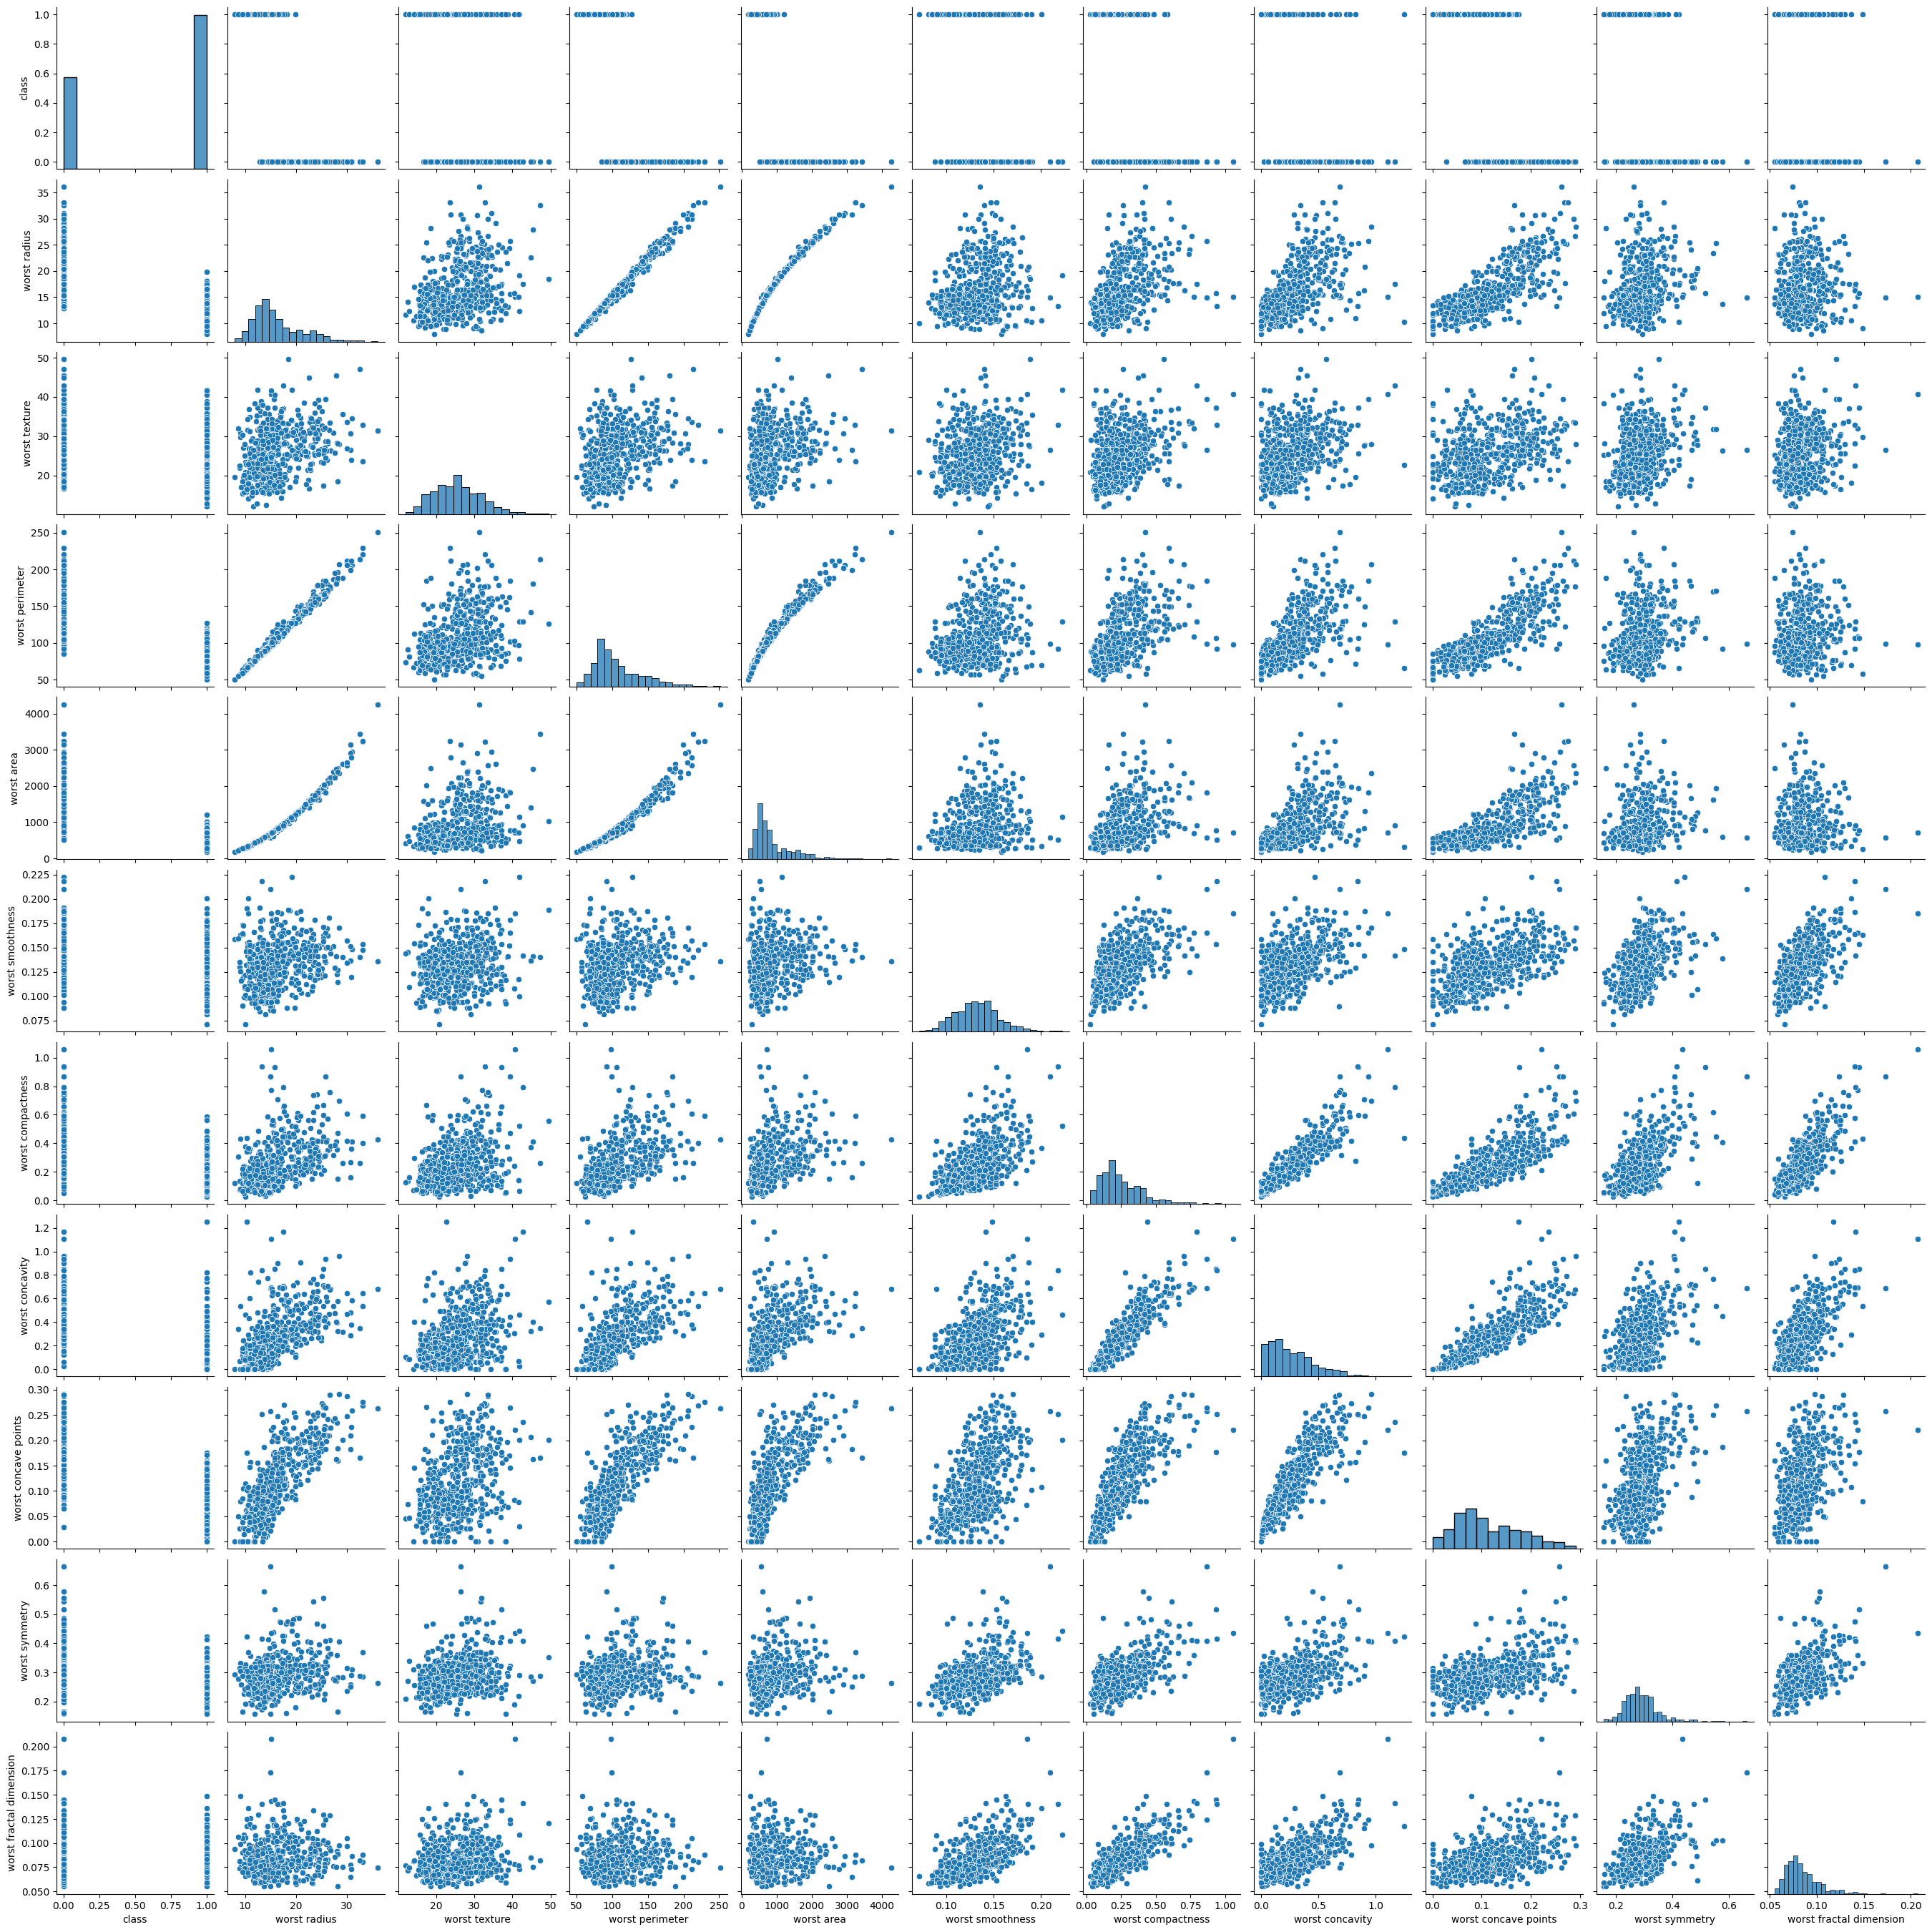

In [5]:
sns.pairplot(df[['class'] + list(df.columns[20:30])])
plt.show()

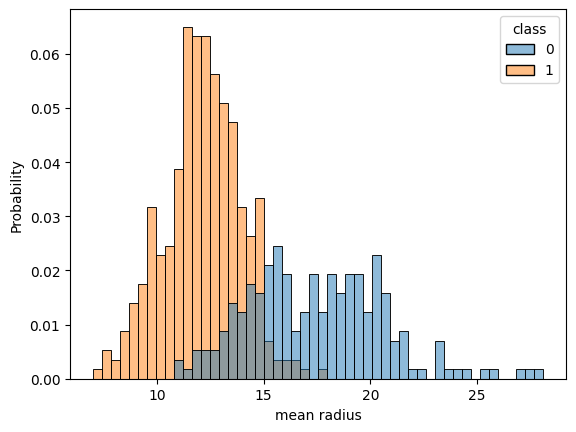

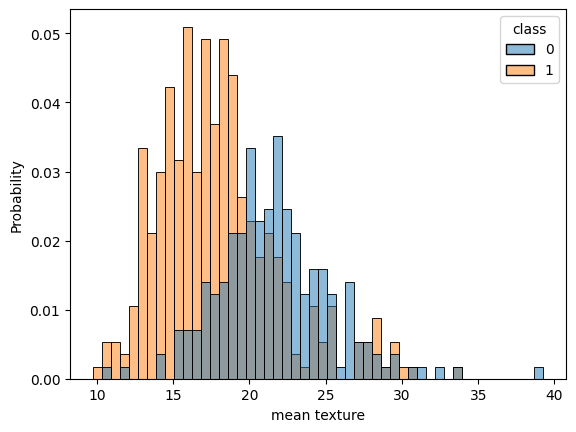

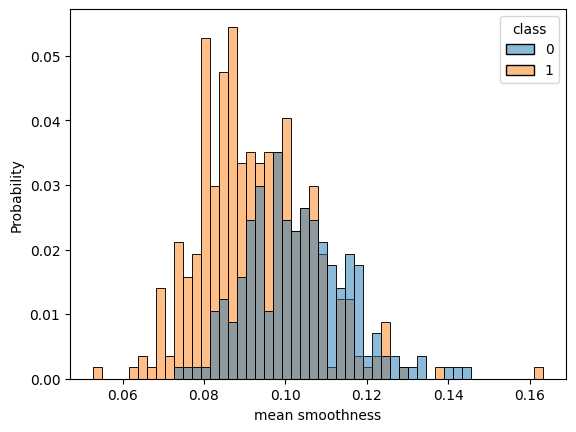

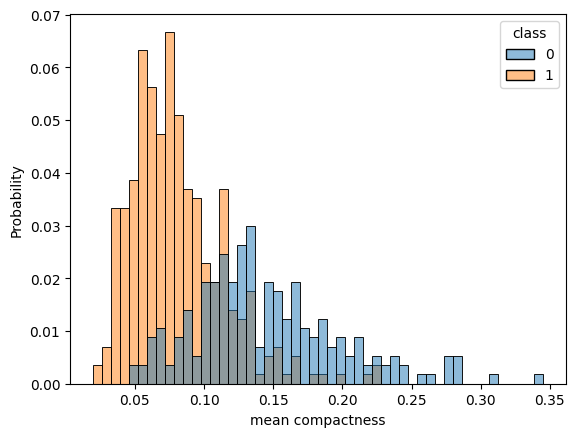

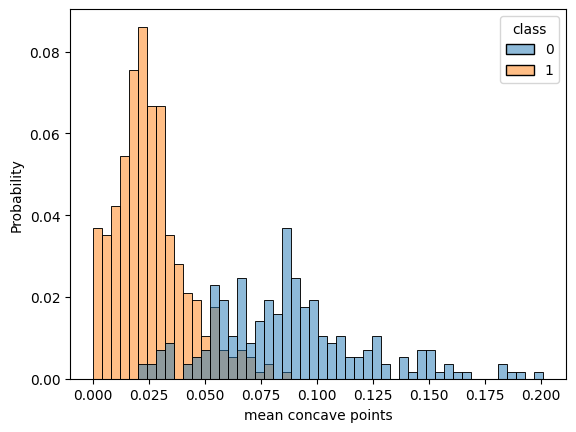

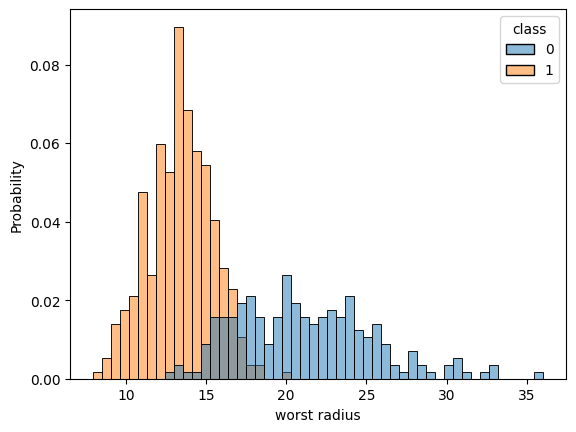

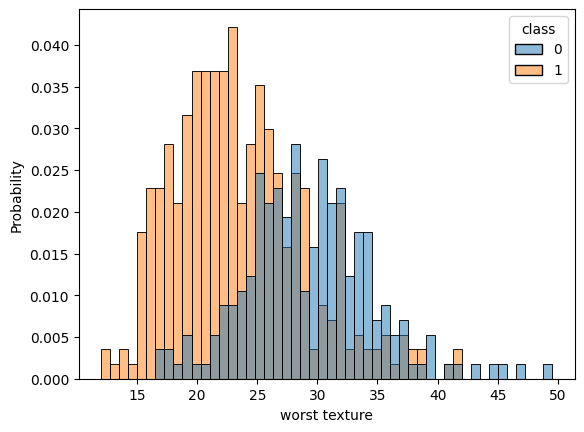

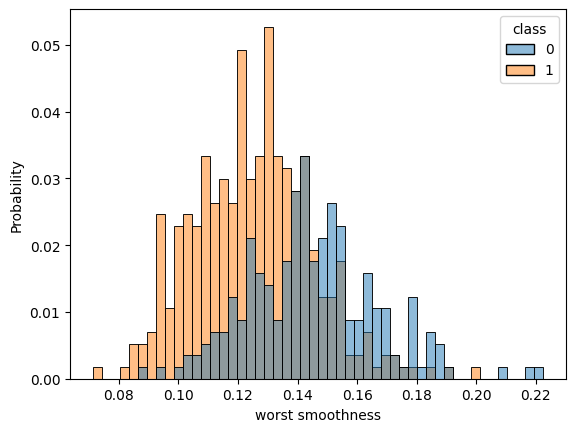

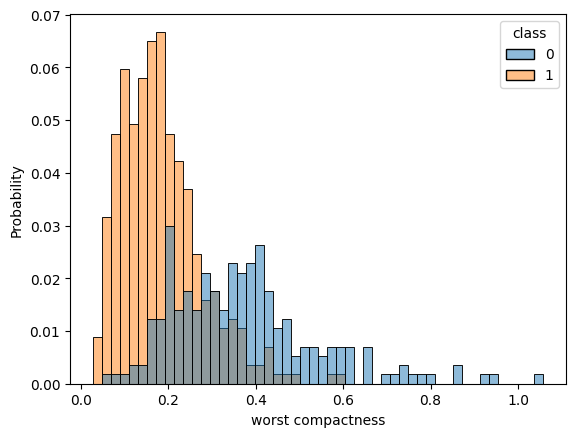

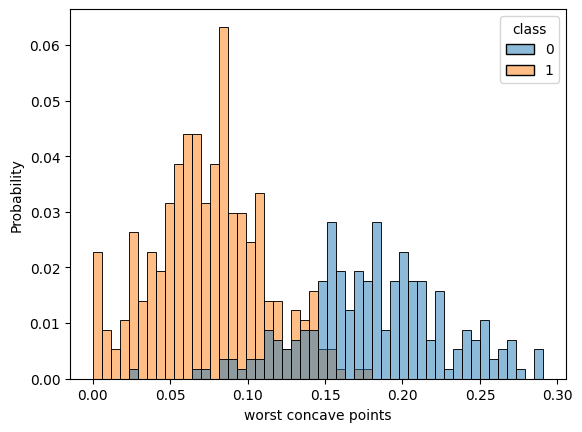

In [ ]:
# 사용할 행만 간추려서 히스토그램으로 시각화

cols = ["mean radius", "mean texture", "mean smoothness", "mean compactness", "mean concave points", "worst radius", "worst texture", "worst smoothness", "worst compactness", "worst concave points", "class"]

for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

In [ ]:
data = torch.from_numpy(df[cols].values).float()
print(data.shape)

x = data[:, :-1] # 마지막 행을 제외한 행들을 x로 설정
y = data[:, -1:] # 마지막 행만 y로 설정

print(x.shape, y.shape)

torch.Size([569, 11])
torch.Size([569, 10]) torch.Size([569, 1])


In [ ]:
# 학습 설정
epochs = 200000     # 학습 반복 횟수
lr = 1e-2           # 학습률
interval = 10000    # 학습 결과를 출력할 간격

# 모델 정의
class MyModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim                      # 입력 차원 저장
        self.output_dim = output_dim                    # 출력 차원 저장

        super().__init__()                              # nn.Module 초기화

        self.linear = nn.Linear(input_dim, output_dim)  # 선형 변환 설정
        self.act = nn.Sigmoid()                         # 활성화 함수로 시그모이드 선택
    
    def forward(self, x):
        y = self.act(self.linear(x))                    # 선형 변환 후 시그모이드 적용
        return y

model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))    # 모델 설정
crit = nn.BCELoss()                                             # 손실 함수 설정 (이진 분류이므로 BCE 사용)
optimizer = optim.SGD(model.parameters(), lr=lr)                # 옵티마이저 함수로 확률적 경사 하강법 사용

In [ ]:
# 모델 학습
for i in range(epochs):
    y_hat = model(x)                # 예측값 계산
    loss = crit(y_hat, y)           # MSE 손실 함수 계산

    optimizer.zero_grad()           # 기울기 초기화
    loss.backward()                 # 역전파로 기울기 계산
    optimizer.step()                # 가중치 업데이트

    # 학습 진행 상황 출력
    if (i + 1) % interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 10000: loss=2.7857e-01
Epoch 20000: loss=2.2926e-01
Epoch 30000: loss=1.9991e-01
Epoch 40000: loss=1.8080e-01
Epoch 50000: loss=1.6747e-01
Epoch 60000: loss=1.5767e-01
Epoch 70000: loss=1.5016e-01
Epoch 80000: loss=1.4421e-01
Epoch 90000: loss=1.3939e-01
Epoch 100000: loss=1.3540e-01
Epoch 110000: loss=1.3203e-01
Epoch 120000: loss=1.2915e-01
Epoch 130000: loss=1.2666e-01
Epoch 140000: loss=1.2448e-01
Epoch 150000: loss=1.2256e-01
Epoch 160000: loss=1.2084e-01
Epoch 170000: loss=1.1931e-01
Epoch 180000: loss=1.1792e-01
Epoch 190000: loss=1.1666e-01
Epoch 200000: loss=1.1551e-01


In [ ]:
# 정확도 확인

correct_cnt = (y == (y_hat > 0.5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

Accuracy: 0.9666


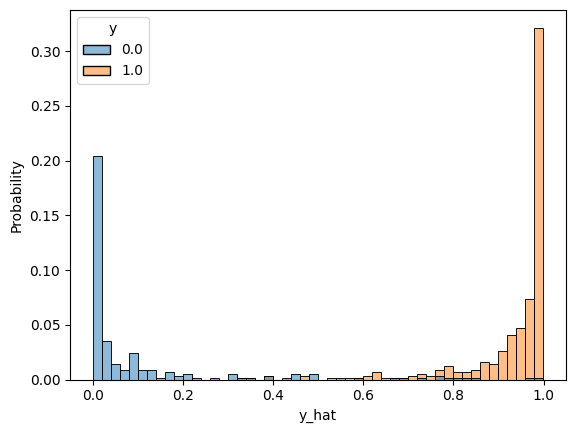

In [ ]:
# 결괏값 분포도 히스토그램으로 시각화

df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()